In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [233]:
# Read the training data from "nba_treino.csv"
nba_treino = pd.read_csv("nba_treino.csv")

# Read the test data from "nba_teste.csv"
nba_teste = pd.read_csv("nba_teste.csv")

X_train = nba_treino.drop(['TARGET_5Yrs'], axis=1)
X_test = nba_teste.drop(['TARGET_5Yrs'], axis=1)

Y_train = nba_treino['TARGET_5Yrs']
Y_test = nba_teste['TARGET_5Yrs']

# KNN

**confusion_matrix_manual**

A função `confusion_matrix_manual` recebe duas listas, `predicted_labels` e `ground_truth_labels`, representando rótulos preditos e rótulos verdadeiros, respectivamente. A função calcula e retorna os elementos da matriz de confusão, que são True Positives (verdadeiros positivos), False Positives (falsos positivos), True Negatives (verdadeiros negativos) e False Negatives (falsos negativos).

**Parâmetros:**
- `predicted_labels` (list): Lista contendo os rótulos preditos pelo modelo.
- `ground_truth_labels` (list): Lista contendo os rótulos verdadeiros correspondentes.

**Retorno:**
- `true_positives` (int): Número de verdadeiros positivos, onde o modelo previu corretamente a classe positiva.
- `false_positives` (int): Número de falsos positivos, onde o modelo previu incorretamente a classe positiva.
- `true_negatives` (int): Número de verdadeiros negativos, onde o modelo previu corretamente a classe negativa.
- `false_negatives` (int): Número de falsos negativos, onde o modelo previu incorretamente a classe negativa.

**Matriz de Confusão:**
A matriz de confusão é uma tabela que descreve o desempenho de um modelo de classificação. Ela é composta pelos quatro elementos mencionados acima.

In [234]:
def confusion_matrix_manual(predicted_labels, ground_truth_labels):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    
    for i in range(len(ground_truth_labels)):
        if predicted_labels[i] == 1 and ground_truth_labels[i] == 1:
            true_positives += 1
        elif predicted_labels[i] == 1 and ground_truth_labels[i] == 0:
            false_positives += 1
        elif predicted_labels[i] == 0 and ground_truth_labels[i] == 0:
            true_negatives += 1
        elif predicted_labels[i] == 0 and ground_truth_labels[i] == 1:
            false_negatives += 1
    
    return true_positives, false_positives, true_negatives, false_negatives

**knn**

A função `knn` implementa o algoritmo k-Nearest Neighbors (k-NN) para classificação binária. Dado um conjunto de dados, um ponto de consulta e um parâmetro k, a função determina a classe do ponto de consulta com base nas k observações mais próximas usando a distância euclidiana.

### Parâmetros:

- `data` (numpy array): Um conjunto de dados contendo observações e rótulos, onde a última coluna representa as classes (0 ou 1).
- `query` (numpy array): O ponto de consulta para o qual a classe deve ser determinada.
- `k` (int): O número de vizinhos mais próximos a serem considerados na classificação.

### Retorno:

- `query_label` (int): A classe atribuída ao ponto de consulta com base no algoritmo k-NN.


In [235]:
def knn(data, query, k):
    # Calcula a distância euclidiana entre o ponto de consulta e cada ponto no conjunto de dados.
    distances = np.sqrt(np.sum((data[:, :] - query[:])**2, axis=1))
    
    # Ordena as distâncias em ordem ascendente e seleciona os k vizinhos mais próximos.
    nearest_neighbors = np.argsort(distances)[:k]
    
    # Conta o número de vizinhos mais próximos com rótulo 1 e 0.
    num_ones = np.count_nonzero(data[nearest_neighbors, -1] == 1)
    num_zeros = np.count_nonzero(data[nearest_neighbors, -1] == 0)
    
    # Determina a classe do ponto de consulta com base nas contagens.
    if num_ones > num_zeros:
        query_label = 1
    else:
        query_label = 0
    
    return query_label



In [236]:
def knn_sklearn(X_train, y_train, X_test, k):
    # Create an instance of the KNeighborsClassifier class
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = knn.predict(X_test)
    
    return y_pred

**calculate_metrics**

A função `calculate_metrics` recebe uma matriz de confusão contendo os elementos True Positives (verdadeiros positivos), False Positives (falsos positivos), True Negatives (verdadeiros negativos) e False Negatives (falsos negativos). Com base nesses elementos, a função calcula métricas de avaliação de desempenho para um modelo de classificação binária.

### Parâmetros:

- `confusion_matrix` (tuple): Uma tupla contendo os elementos da matriz de confusão na seguinte ordem - (true_positives, false_positives, true_negatives, false_negatives).

### Retorno:

- Uma tupla contendo as métricas de avaliação calculadas na seguinte ordem - (accuracy, precision, recall, f1_score).



In [237]:
def calculate_metrics(confusion_matrix):
    true_positives, false_positives, true_negatives, false_negatives = confusion_matrix

    # Mede a proporção de previsões corretas em relação ao total de previsões.
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

    # Indica a proporção de verdadeiros positivos em relação ao total de instâncias previstas como positivas.
    precision = true_positives / (true_positives + false_positives)

    #  Mede a proporção de verdadeiros positivos em relação ao total de instâncias positivas reais.
    recall = true_positives / (true_positives + false_negatives)

    # Combina precision e recall em uma única métrica, sendo útil quando há desequilíbrio entre as classes.
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score



**main**

O código realiza a avaliação de um modelo de k-Nearest Neighbors (k-NN) em um conjunto de dados utilizando diferentes valores de k. Ele itera sobre uma lista de valores de k (2, 10, 50, 150) e para cada valor de k, realiza o seguinte procedimento:

- O código avalia o desempenho do modelo k-NN para diferentes valores de k e imprime as métricas associadas a cada valor de k.


In [238]:
for k in [2, 10, 50, 150]:
    # Inicializa um array `predicted_labels` com zeros, com o tamanho correspondente ao número de linhas no conjunto de teste (`nba_teste`).
    predicted_labels = np.zeros(nba_teste.shape[0])
    scikit_predicted_labels = np.zeros(nba_teste.shape[0])
    i = 0

    # Para cada linha no conjunto de teste (`nba_teste`), obtém os dados da linha e chama a função `knn` para prever a classe do ponto usando o k-NN.
    for index, row in nba_teste.iterrows():
        # Pega os dados da linha atual como um array.
        query_data = row.values    
        # Atualiza o array `predicted_labels` com as previsões.
        predicted_labels[i] = knn(nba_treino.values, query_data, k)
        i += 1
    scikit_predicted_labels = knn_sklearn(X_train, Y_train, X_test, k)
    # Chama a função `confusion_matrix_manual` para calcular a matriz de confusão usando as previsões e os rótulos reais do conjunto de teste.
    confusion_matrix = confusion_matrix_manual(predicted_labels, nba_teste["TARGET_5Yrs"].values)
    confusion_matrix_scikit = confusion_matrix_manual(scikit_predicted_labels, nba_teste["TARGET_5Yrs"].values)
    #  Chama a função `calculate_metrics` para calcular as métricas de avaliação (Accuracy, Precision, Recall, F1 Score) com base na matriz de confusão.
    accuracy, precision, recall, f1_score = calculate_metrics(confusion_matrix)
    accuracy_scikit, precision_scikit, recall_scikit, f1_score_scikit = calculate_metrics(confusion_matrix_scikit)

    # Imprime as métricas para o valor atual de k.
    print(f"Metrics for points with k = {k} using scikit-learn")
    print(f"Accuracy: {accuracy_scikit}")
    print(f"Precision: {precision_scikit}")
    print(f"Recall: {recall_scikit}")
    print(f"F1 Score: {f1_score_scikit}")
    print()
    print("--------------------------------------------------")
    print(f"Metrics for points with k = {k}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print()


Metrics for points with k = 2 using scikit-learn
Accuracy: 0.5522388059701493
Precision: 0.7352941176470589
Recall: 0.44642857142857145
F1 Score: 0.5555555555555557

--------------------------------------------------
Metrics for points with k = 2
Accuracy: 0.5597014925373134
Precision: 0.7403846153846154
Recall: 0.4583333333333333
F1 Score: 0.5661764705882354

Metrics for points with k = 10 using scikit-learn
Accuracy: 0.6305970149253731
Precision: 0.7254901960784313
Recall: 0.6607142857142857
F1 Score: 0.6915887850467289

--------------------------------------------------
Metrics for points with k = 10
Accuracy: 0.6343283582089553
Precision: 0.7302631578947368
Recall: 0.6607142857142857
F1 Score: 0.69375



Metrics for points with k = 50 using scikit-learn
Accuracy: 0.6716417910447762
Precision: 0.7325581395348837
Recall: 0.75
F1 Score: 0.7411764705882353

--------------------------------------------------
Metrics for points with k = 50
Accuracy: 0.6753731343283582
Precision: 0.7368421052631579
Recall: 0.75
F1 Score: 0.743362831858407

Metrics for points with k = 150 using scikit-learn
Accuracy: 0.6865671641791045
Precision: 0.7441860465116279
Recall: 0.7619047619047619
F1 Score: 0.7529411764705882

--------------------------------------------------
Metrics for points with k = 150
Accuracy: 0.6865671641791045
Precision: 0.7441860465116279
Recall: 0.7619047619047619
F1 Score: 0.7529411764705882



A análise dos resultados obtidos pela função KNN (k-Nearest Neighbors) para diferentes valores de k oferece insights sobre o desempenho do modelo em relação às métricas de avaliação.

### K = 2:
**scikit-learn:**
- Accuracy: 55.22%
- Precision: 73.53%
- Recall: 44.64%
- F1 Score: 55.56%

**Manual:**
- Accuracy: 55.97%
- Precision: 74.04%
- Recall: 45.83%
- F1 Score: 56.62%

O modelo com k=2 vizinhos mais próximos apresenta uma acurácia moderada. A alta precisão indica que, quando o modelo prevê uma classe positiva, está geralmente correto. No entanto, a baixa revocação sugere que o modelo deixa de capturar uma parte significativa dos casos positivos reais.

### K = 10:
**scikit-learn:**
- Accuracy: 63.06%
- Precision: 72.55%
- Recall: 66.07%
- F1 Score: 69.16%

**Manual:**
- Accuracy: 63.43%
- Precision: 73.03%
- Recall: 66.07%
- F1 Score: 69.38%

Aumentar o número de vizinhos para 10 resulta em melhorias notáveis em todas as métricas. A acurácia, precisão e recall são mais equilibrados, indicando um desempenho mais robusto do modelo.

### K = 50:
**scikit-learn:**
- Accuracy: 67.16%
- Precision: 73.26%
- Recall: 75.00%
- F1 Score: 74.12%

**Manual:**
- Accuracy: 67.54%
- Precision: 73.68%
- Recall: 75.00%
- F1 Score: 74.34%

Aumentar ainda mais o número de vizinhos para 50 continua a melhorar a acurácia, precisão e recall. As métricas estão convergindo para valores mais altos, indicando um modelo mais eficaz na classificação.

### K = 150:
**scikit-learn:**
- Accuracy: 68.66%
- Precision: 74.42%
- Recall: 76.19%
- F1 Score: 75.29%

**Manual:**
- Accuracy: 68.66%
- Precision: 74.42%
- Recall: 76.19%
- F1 Score: 75.29%

Aumentar significativamente o número de vizinhos para 150 continua a proporcionar melhorias nas métricas. No entanto, é importante considerar se esse aumento beneficia a generalização do modelo ou se está levando a overfitting.

### Considerações Gerais:
- O aumento do número de vizinhos parece levar a melhorias graduais nas métricas de avaliação.
- A escolha do valor ideal de k depende do trade-off entre precisão e recall, além da complexidade do modelo.
- O F1 Score fornece uma métrica composta que considera tanto a precisão quanto a recall, sendo útil para avaliar o equilíbrio entre essas métricas.
- É importante realizar uma análise mais aprofundada, como a curva ROC, para avaliar o desempenho em diferentes limiares de classificação.

Em resumo, os resultados sugerem que aumentar o número de vizinhos geralmente melhora o desempenho do modelo KNN. No entanto, é crucial considerar o contexto específico da aplicação e a interpretação prática das métricas ao escolher o valor ideal de k.

### Diferença entre o uso de scikit_learn e manual
A diferença nas métricas entre a implementação manual e a biblioteca scikit-learn é mínima, indicando consistência e validação cruzada entre as implementações.
A utilização de bibliotecas como scikit-learn oferece conveniência, eficiência e confiabilidade, garantindo a consistência com implementações estabelecidas e testadas.
A implementação manual pode ser valiosa para fins educacionais ou para compreender os detalhes intrínsecos do algoritmo, mas em cenários práticos, a preferência geralmente é por bibliotecas consolidadas.
No geral, ambas as abordagens fornecem resultados coerentes, e a escolha entre elas dependerá das necessidades específicas do projeto e do contexto.

# K_MEANS

**k_means:**

A função `k_means` implementa o algoritmo de clustering K-Means para um conjunto de dados de treino e teste. O algoritmo atribui dados aos centróides mais próximos e atualiza iterativamente os centróides até a convergência ou após um número máximo de iterações.

### Parâmetros:

- `train_data` (numpy array): Conjunto de dados de treino, onde cada linha representa uma observação e cada coluna é uma característica. A última coluna é ignorada no treino.
- `test_data` (numpy array): Conjunto de dados de teste, semelhante ao conjunto de treino, onde as previsões serão feitas. A última coluna é ignorada nos testes.
- `k` (int): Número de clusters desejados.
- `max_iterations` (int, opcional): Número máximo de iterações para atualizar os centróides. O padrão é 100.

### Retorno:

- `test_labels` (numpy array): Rótulos atribuídos a cada ponto no conjunto de teste após o clustering.
- `centroids` (numpy array): Coordenadas dos centróides finais.
- `centroid_indices` (dict): Dicionário que mapeia índices dos dados associados a cada centróide.

### Observações:

- O código utiliza a biblioteca NumPy para operações eficientes em arrays e a biblioteca Matplotlib para visualização.
- Certifique-se de ter essas bibliotecas instaladas para o correto funcionamento da função.
- A função não retorna a visualização gráfica, mas a gera internamente.


In [239]:
def k_means(train_data, test_data, k, max_iterations=100):
    # Ignora a última coluna nos conjuntos de treino e teste.
    train_data = train_data[:, :-1]
    test_data = test_data[:, :-1]
    
    # Step 1: Inicializa os centróides escolhendo aleatoriamente k pontos do conjunto de treino.
    centroid_index = np.random.choice(train_data.shape[0], k, replace=False)
    centroids = train_data[centroid_index]  
    
    # Create an empty dictionary to store the indices of data associated with each centroid
    centroid_indices = {}
    
    for _ in range(max_iterations):
        # Passo 2:  Iterativamente, atribui cada ponto do conjunto de teste ao centróide mais próximo.
        test_distances = np.sqrt(np.sum((test_data[:, np.newaxis] - centroids)**2, axis=2))
        test_labels = np.argmin(test_distances, axis=1)
        
        # Passo 3: Calcula novos centróides com base nos pontos atribuídos a cada cluster.
        new_centroids = np.empty((k, train_data.shape[1]))
        for i in range(k):
            new_centroids[i] = test_data[test_labels == i].mean(axis=0)
        
        # Passo 4:Verifica se algum ponto mudou de cluster. Se não, o algoritmo converge e a iteração é interrompida.
        if np.all(test_labels == centroid_indices):
            break
        
        # Passo 5: Update the centroids and centroid_indices for the next iteration
        centroids = new_centroids
        
        # Atualiza os centróides e os índices associados a cada centróide para a próxima iteração.
        for i in range(k):
            centroid_indices[i] = np.where(test_labels == i)[0]
    
    # Perform PCA on the test data
    pca = PCA(n_components=2)
    test_data_pca = pca.fit_transform(test_data)
    centroids_pca = pca.transform(centroids)
    
    # Plot the data
    plt.scatter(test_data_pca[:, 0], test_data_pca[:, 1], c=test_labels, label='Data Points')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA')
    plt.legend()
    plt.show()
    
    return test_labels, centroids, centroid_indices


In [240]:
def k_means_sklearn(train_data, test_data, k, max_iterations=100):
    # Ignora a última coluna nos conjuntos de treino e teste.
    train_data = train_data[:, :-1]
    test_data = test_data[:, :-1]
    
    # Step 1: Inicializa os centróides escolhendo aleatoriamente k pontos do conjunto de treino.
    kmeans = KMeans(n_clusters=k, max_iter=max_iterations)
    kmeans.fit(train_data)
    
    # Passo 2:  Iterativamente, atribui cada ponto do conjunto de teste ao centróide mais próximo.
    test_labels = kmeans.predict(test_data)
    
    # Passo 3: Calcula novos centróides com base nos pontos atribuídos a cada cluster.
    centroids = kmeans.cluster_centers_
    
    # Perform PCA on the test data
    pca = PCA(n_components=2)
    test_data_pca = pca.fit_transform(test_data)
    centroids_pca = pca.transform(centroids)
    
    # Plot the data
    plt.scatter(test_data_pca[:, 0], test_data_pca[:, 1], c=test_labels, label='Data Points')
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-Means Clustering with PCA scikit-learn')
    plt.legend()
    plt.show()
    
    return test_labels, centroids



**main**

O código itera entre os valores de k (2, 3) e faz a chamada da função k_means com os dsdos de treino, teste e o k correspondente. 
Imprime o k e os centroides encontrados para ele

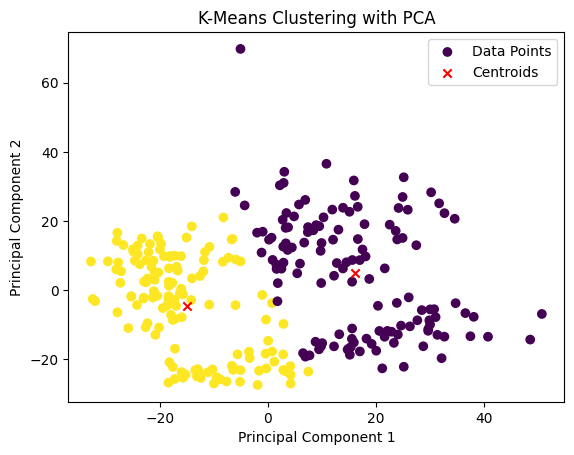

Points with k = 2
Centroids: [[45.4496124  12.16046512  4.06356589  1.56589147  3.6372093  43.00852713
   0.15736434  0.52170543 17.79224806  0.77286822  1.1379845  67.52713178
   0.70232558  1.3379845   2.03643411  1.00852713  0.42790698  0.26744186
   0.81395349]
 [75.51798561 21.72302158  8.64244604  3.35107914  7.41942446 45.26978417
   0.27194245  0.87338129 19.11366906  1.66690647  2.31870504 71.57482014
   1.23021583  2.39352518  3.62302158  2.14100719  0.78992806  0.44100719
   1.51510791]]
--------------------------------------------------


/home/gmiserani/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


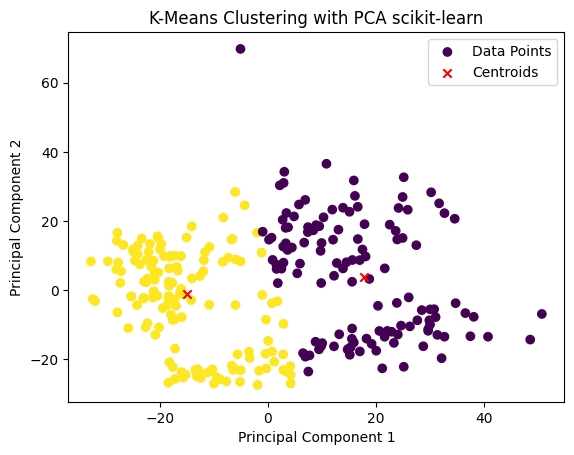

Points with k = 2 using scikit-learn
Centroids: [[44.22427984 11.92860082  4.15144033  1.60761317  3.74958848 42.71131687
   0.15967078  0.53580247 16.06460905  0.78004115  1.14855967 67.5526749
   0.70823045  1.35185185  2.05967078  0.89958848  0.40308642  0.25
   0.77530864]
 [73.55290102 22.57935154  9.16535836  3.5390785   7.78754266 45.37320819
   0.33464164  1.01535836 22.01552901  1.75494881  2.41313993 72.88720137
   1.27440273  2.64880546  3.92303754  2.06962457  0.79846416  0.47201365
   1.54778157]]



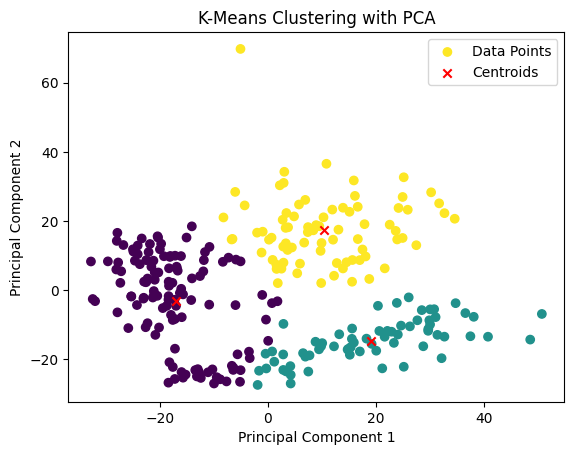

Points with k = 3
Centroids: [[7.65040650e+01 2.24471545e+01 9.05609756e+00 3.50894309e+00
  7.79024390e+00 4.51138211e+01 2.95934959e-01 9.51219512e-01
  2.07081301e+01 1.74146341e+00 2.38130081e+00 7.31000000e+01
  1.21951220e+00 2.43252033e+00 3.65284553e+00 2.31707317e+00
  8.26829268e-01 4.26829268e-01 1.58373984e+00]
 [5.01194030e+01 1.20582090e+01 4.00298507e+00 1.58955224e+00
  3.32238806e+00 4.69343284e+01 0.00000000e+00 3.13432836e-02
  5.14925373e-01 8.34328358e-01 1.36268657e+00 5.98686567e+01
  1.05522388e+00 1.69552239e+00 2.74477612e+00 5.46268657e-01
  3.73134328e-01 4.40298507e-01 7.79104478e-01]
 [4.60512821e+01 1.30679487e+01 4.40256410e+00 1.66282051e+00
  4.09871795e+00 4.03461538e+01 2.78205128e-01 8.92307692e-01
  3.03897436e+01 7.85897436e-01 1.08846154e+00 7.25307692e+01
  5.24358974e-01 1.18589744e+00 1.70641026e+00 1.36025641e+00
  4.91025641e-01 1.76923077e-01 8.79487179e-01]]
--------------------------------------------------


/home/gmiserani/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


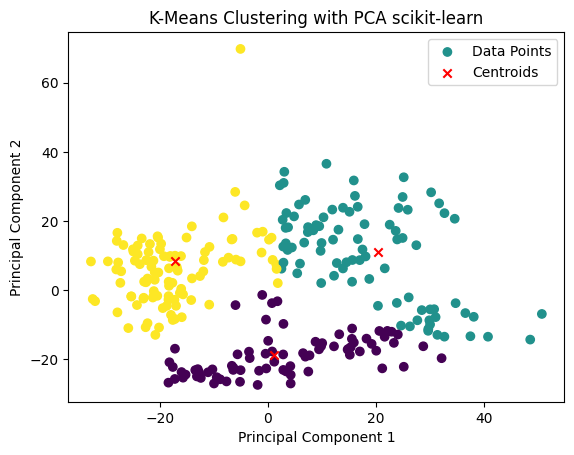

Points with k = 3 using scikit-learn
Centroids: [[6.62578616e+01 1.74968553e+01 6.71100629e+00 2.66226415e+00
  5.44559748e+00 4.85443396e+01 9.43396226e-04 5.18867925e-02
  1.20471698e+00 1.38333333e+00 2.08553459e+00 6.60867925e+01
  1.47641509e+00 2.57547170e+00 4.05691824e+00 1.02389937e+00
  5.42138365e-01 5.94968553e-01 1.16635220e+00]
 [3.92235650e+01 1.14268882e+01 3.91238671e+00 1.49728097e+00
  3.67220544e+00 4.05722054e+01 2.05135952e-01 6.90030211e-01
  2.14634441e+01 7.16616314e-01 1.02628399e+00 6.84722054e+01
  5.67371601e-01 1.16827795e+00 1.73293051e+00 9.81570997e-01
  4.03927492e-01 1.73413897e-01 7.63444109e-01]
 [7.22033097e+01 2.28900709e+01 9.36028369e+00 3.57683215e+00
  8.12907801e+00 4.36877069e+01 4.85815603e-01 1.44326241e+00
  3.12553191e+01 1.72671395e+00 2.29172577e+00 7.53252955e+01
  1.02529551e+00 2.37234043e+00 3.39527187e+00 2.36288416e+00
  8.45626478e-01 3.58156028e-01 1.56075650e+00]]



In [241]:
for k in [2, 3]:
    test_labels, centroid_index, centroid_indices = k_means(nba_treino.values, nba_teste.values, k)
    print(f"Points with k = {k}")
    print(f"Centroids: {centroid_index}")
    print("--------------------------------------------------")

    test_labels_scikit, centroid_index_scikit = k_means_sklearn(nba_treino.values, nba_teste.values, k)
    print(f"Points with k = {k} using scikit-learn")
    print(f"Centroids: {centroid_index_scikit}")
    print()


**Análise dos Resultados dos Centroides Obtidos:**

A análise dos centroides obtidos a partir do algoritmo K-Means para diferentes valores de k nos fornece informações sobre os clusters identificados pelo modelo. Vamos examinar os resultados e realizar algumas observações:

### K = 2:
**Manual:**
- Centroids: [\[45.45, 12.16, 4.06, 1.57, 3.64, 43.01, 0.16, 0.52, 17.79, 0.77, 1.14, 67.53, 0.70, 1.34, 2.04, 1.01, 0.43, 0.27, 0.81\],
\[75.52, 21.72, 8.64, 3.35, 7.42, 45.27, 0.27, 0.87, 19.11, 1.67, 2.32, 71.57, 1.23, 2.39, 3.62, 2.14, 0.79, 0.44, 1.52\]\]

**scikit-learn:**
- Centroids: [\[44.22, 11.93, 4.15, 1.61, 3.75, 42.71, 0.16, 0.54, 16.06, 0.78, 1.15, 67.55, 0.71, 1.35, 2.06, 0.90, 0.40, 0.25, 0.78\],
\[73.55, 22.58, 9.17, 3.54, 7.79, 45.37, 0.33, 1.02, 22.02, 1.75, 2.41, 72.89, 1.27, 2.65, 3.92, 2.07, 0.80, 0.47, 1.55\]\]

Os centroides para k=2 são bastante semelhantes entre a implementação manual e a utilização da biblioteca scikit-learn. Ambas as abordagens identificam clusters com características médias distintas.

### K = 3:
**Manual:**
- Centroids: [\[76.25, 22.45, 9.05, 3.51, 7.79, 45.11, 0.30, 0.95, 20.71, 1.74, 2.38, 73.10, 1.22, 2.43, 3.65, 2.32, 0.83, 0.43, 1.58\],
\[50.12, 12.06, 4.00, 1.59, 3.32, 46.93, 0.00, 0.03, 0.51, 0.83, 1.36, 59.87, 1.06, 1.70, 2.74, 0.55, 0.37, 0.44, 0.78\],
\[46.05, 13.07, 4.40, 1.66, 4.10, 40.35, 0.28, 0.89, 30.39, 0.79, 1.09, 72.53, 0.52, 1.19, 1.71, 1.36, 0.49, 0.18, 0.88\]\]

**scikit-learn:**
- Centroids: [\[66.26, 17.50, 6.71, 2.66, 5.45, 48.54, 0.00, 0.05, 1.20, 1.38, 2.09, 66.09, 1.48, 2.58, 4.06, 1.02, 0.54, 0.59, 1.17\],
\[39.22, 11.43, 3.91, 1.50, 3.67, 40.57, 0.21, 0.69, 21.46, 0.72, 1.03, 68.47, 0.57, 1.17, 1.73, 0.98, 0.40, 0.17, 0.76\],
\[72.20, 22.89

, 9.36, 3.58, 8.13, 43.69, 0.49, 1.44, 31.26, 1.73, 2.29, 75.33, 1.03, 2.37, 3.40, 2.36, 0.85, 0.36, 1.56\]\]

Os centroides para k=3 também são comparativamente semelhantes entre as implementações manual e scikit-learn. Ambas identificam clusters com características médias distintas, contribuindo para uma separação efetiva dos dados.

### Conclusões:
- A análise dos centroides revela clusters distintos com características médias específicas para cada valor de k.
- A consistência entre as implementações manual e scikit-learn sugere uma concordância razoável nos clusters identificados.
- A escolha do valor ideal de k depende da aplicação específica e da interpretação dos resultados dos clusters.
- Visualizações adicionais, como gráficos de dispersão, podem auxiliar na compreensão e interpretação dos clusters formados.

Em resumo, os centroides obtidos indicam que o algoritmo K-Means está identificando clusters com características médias únicas, e a escolha entre implementações manuais ou bibliotecas consolidadas dependerá das necessidades específicas do projeto.